In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

In [12]:
# Load CIFAR-10 dataset
(images_train, cls_train), (images_test, cls_test) = cifar10.load_data()

In [13]:
# Display dataset shapes
print("images_train shape: ", images_train.shape)
print("class_train shape: ", cls_train.shape)

images_train shape:  (50000, 32, 32, 3)
class_train shape:  (50000, 1)


In [14]:
# Reshape the training images
x_images_training = images_train[:, :, :, 0]
x_train = x_images_training.reshape((50000, 32 * 32))
y_train = cls_train.flatten()  # Flatten to 1D array

In [17]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_images_training shape:",x_images_training.shape)

x_train shape: (50000, 1024)
y_train shape: (50000,)
x_images_training shape: (50000, 32, 32)


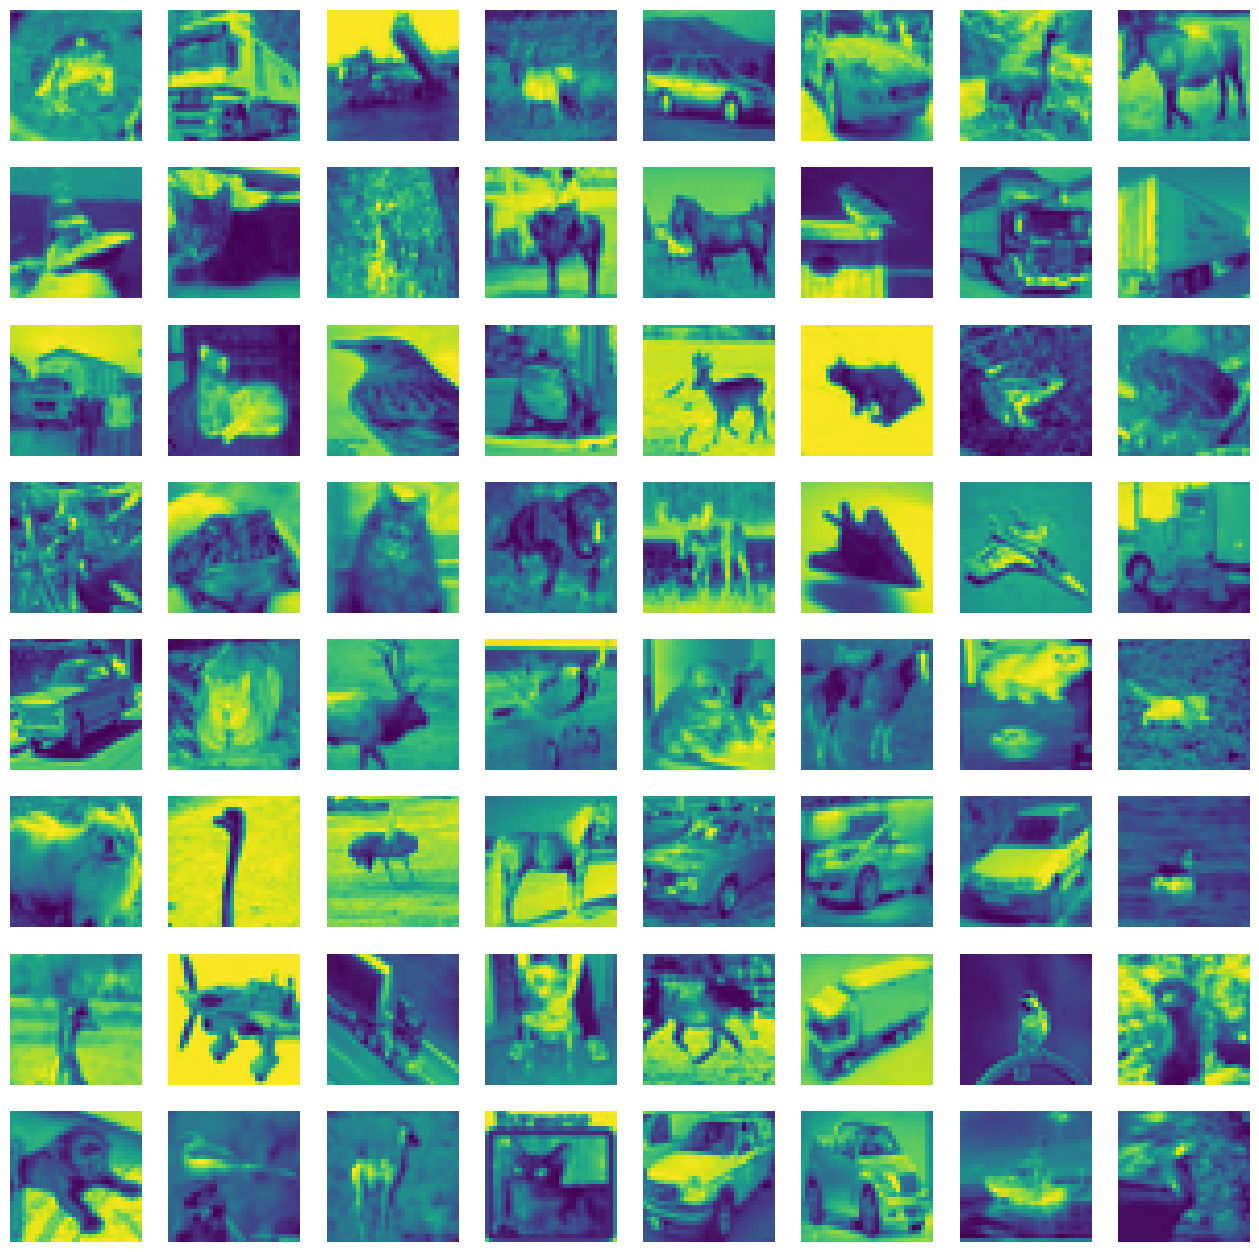

In [18]:
# Visualize some training images
fig = plt.figure(figsize=(16, 16))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)
    ax.imshow(x_images_training[i])
    ax.axis('off')
plt.show()

In [19]:
# Perform PCA for dimensionality reduction
pca = PCA(whiten=True)
pca.fit(x_train)

PCA(whiten=True)

In [20]:
# Determine the number of components that explain 99% of variance
k = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1
print("Number of components for 99% variance: ", k)

# Transform training data using PCA
pca_cifar = PCA(n_components=k, whiten=True)
x_train_transformed = pca_cifar.fit_transform(x_train)

# Reshape and transform the test images
x_images_test = images_test[:, :, :, 0]
x_test = x_images_test.reshape((10000, 32 * 32))
y_test = cls_test.flatten()  # Flatten to 1D array

# Transform test data using the same PCA
x_test_transformed = pca_cifar.transform(x_test)

Number of components for 99% variance:  429


In [21]:
# Initialize classifiers
clf1 = RandomForestClassifier(n_estimators=429, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)
clf2 = LogisticRegression(n_jobs=-1, multi_class="auto", max_iter=200)  # Ensure convergence
clf3 = KNeighborsClassifier(n_jobs=-1)
clf4 = SVC(tol=0.0001)

In [22]:
# Train classifiers
print('Training classifiers...')
clf1.fit(x_train_transformed, y_train)
print("RandomForestClassifier trained.")
clf2.fit(x_train_transformed, y_train)
print("LogisticRegression trained.")
clf3.fit(x_train_transformed, y_train)
print("KNeighborsClassifier trained.")
clf4.fit(x_train_transformed, y_train)
print("SVC trained.")

Training classifiers...
RandomForestClassifier trained.
LogisticRegression trained.
KNeighborsClassifier trained.
SVC trained.


In [23]:
# Make predictions on the test set
y_test_predicted1 = clf1.predict(x_test_transformed)
y_test_predicted2 = clf2.predict(x_test_transformed)
y_test_predicted3 = clf3.predict(x_test_transformed)
y_test_predicted4 = clf4.predict(x_test_transformed)


In [24]:
# Combine predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
dic = {i: class_names[i] for i in range(len(class_names))}
ans = []
for i in range(len(y_test_predicted1)):
    arr = np.array([y_test_predicted1[i], y_test_predicted2[i], y_test_predicted3[i], y_test_predicted4[i]])
    ans.append(dic[np.argmax(np.bincount(arr))])

In [25]:
# Save predictions to CSV
np.savetxt(fname="answers.csv", X=ans, delimiter=',', fmt="%s")
print("Predictions saved to answers.csv")

Predictions saved to answers.csv
